Hackathon Den Bosch - 1/11/2019

Thema's:
* Heeft het uberhaupt zin om te spoelen als preventie van legionella? (Simon)
* Wat is de invloed van de flow op de ontwikkeling van legionella? (Thomas)
* Wat is de invloed van de temperatuur / radiation op de ontwikkeling van legionella? (Valerie)
* Zon/schaduw kant

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Loading packages:

In [386]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import pastas as ps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import descartes
import math
import seaborn as sns
import os, sys

#from PIL import Image


from shapely.geometry import Point

%config InlineBackend.figure_format='retina'

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (12,8)

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# KNMI Data

In [618]:
KNMI = pd.read_csv('KNMI_weather_data.csv', sep=',', parse_dates=['YYYYMMDD'], dayfirst=True)

In [619]:
KNMI

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10,TD,...,N,U,WW,IX,M,R,S,O,Y,MEETPUNT
0,370,2016-06-01,1,0,0,0,20,133,,130,...,8,98,20,7,1,0,0,0,0,Eindhoven
1,370,2016-06-01,2,250,10,10,20,126,,123,...,7,98,10,7,0,0,0,0,0,Eindhoven
2,370,2016-06-01,3,0,10,0,20,126,,123,...,7,98,10,7,0,0,0,0,0,Eindhoven
3,370,2016-06-01,4,990,10,10,20,140,,137,...,8,98,10,7,0,0,0,0,0,Eindhoven
4,370,2016-06-01,5,260,20,10,40,144,,143,...,9,99,81,7,1,1,0,0,0,Eindhoven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29707,370,2019-10-21,20,190,30,30,60,125,,94,...,8,81,,5,0,0,0,0,0,Eindhoven
29708,370,2019-10-21,21,200,30,30,50,126,,96,...,8,82,,5,0,0,0,0,0,Eindhoven
29709,370,2019-10-21,22,190,40,50,70,123,,99,...,8,85,,5,0,0,0,0,0,Eindhoven
29710,370,2019-10-21,23,180,40,40,70,116,,105,...,8,93,,5,0,0,0,0,0,Eindhoven


In [620]:
KNMI.index.dtype
KNMI['Datetime'] = KNMI['YYYYMMDD'] + pd.to_timedelta(KNMI['HH'], 'h') 
KNMI.set_index('Datetime', inplace=True)

dtype('int64')

In [624]:
KNMI = KNMI.resample('0.25H', fill_method='ffill')

C:\Programs\Anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


In [625]:
KNMI

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10,TD,...,N,U,WW,IX,M,R,S,O,Y,MEETPUNT
Datetime,,,,,,,,,,,,,,,,,,,,,
2016-06-01 01:00:00,370,2016-06-01,1,0,0,0,20,133,,130,...,8,98,20,7,1,0,0,0,0,Eindhoven
2016-06-01 01:15:00,370,2016-06-01,1,0,0,0,20,133,,130,...,8,98,20,7,1,0,0,0,0,Eindhoven
2016-06-01 01:30:00,370,2016-06-01,1,0,0,0,20,133,,130,...,8,98,20,7,1,0,0,0,0,Eindhoven
2016-06-01 01:45:00,370,2016-06-01,1,0,0,0,20,133,,130,...,8,98,20,7,1,0,0,0,0,Eindhoven
2016-06-01 02:00:00,370,2016-06-01,2,250,10,10,20,126,,123,...,7,98,10,7,0,0,0,0,0,Eindhoven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-21 23:00:00,370,2019-10-21,23,180,40,40,70,116,,105,...,8,93,,5,0,0,0,0,0,Eindhoven
2019-10-21 23:15:00,370,2019-10-21,23,180,40,40,70,116,,105,...,8,93,,5,0,0,0,0,0,Eindhoven
2019-10-21 23:30:00,370,2019-10-21,23,180,40,40,70,116,,105,...,8,93,,5,0,0,0,0,0,Eindhoven


# Monsteruitslagen

In [515]:
Monsteruitslagen = pd.read_csv('Monsteruitslagen_Resultaten.csv', sep=',', index_col='id', parse_dates=[['datum', 'tijd']])

In [516]:
usecols=['datum_tijd','locatienaam', 'component', 'resultaat', 'tempvoor', 'tempna']

In [517]:
Monsteruitslagen.set_index('datum_tijd', inplace=True)
Monsteruitslagen

,serviceorder,locatienaam,monsternummer,nummeranalyserapport,rapportdatum,monsternemer,ruimte,tappunt,product,soort,...,component,resultaat,eh,startdatumanalyse,starttijdanalyse,omschrijving order,appt nr. 1,appt nr. 2,appt nr. 3,appt nr. 4
datum_tijd,,,,,,,,,,,,,,,,,,,,,
2018-05-31 13:15:00,SOHS99617,Noorderkroon (HW),1,5312671,2018-06-08,Giel van de Leest,Kelder koper/zilver ruimte,1e tappunt na koper/zilverion. tapkraan groep A,Drinkwater,Koud water,...,Koloniegetal 22 °C,670,kve̸ml,2018-06-01,08:37,Maandelijkse mon koper/zilverinstallatie 2 mons,NaN,NaN,NaN,NaN
2018-05-31 13:15:00,SOHS99617,Noorderkroon (HW),1,5312671,2018-06-08,Giel van de Leest,Kelder koper/zilver ruimte,1e tappunt na koper/zilverion. tapkraan groep A,Drinkwater,Koud water,...,Koper (ICP-MS),250,µg̸l Cu,2018-06-02,04:33,Maandelijkse mon koper/zilverinstallatie 2 mons,NaN,NaN,NaN,NaN
2018-05-31 13:15:00,SOHS99617,Noorderkroon (HW),1,5312671,2018-06-08,Giel van de Leest,Kelder koper/zilver ruimte,1e tappunt na koper/zilverion. tapkraan groep A,Drinkwater,Koud water,...,Totaal Legionella spp,<100,kve̸l,2018-06-01,09:44,Maandelijkse mon koper/zilverinstallatie 2 mons,NaN,NaN,NaN,NaN
2018-05-31 13:15:00,SOHS99617,Noorderkroon (HW),1,5312671,2018-06-08,Giel van de Leest,Kelder koper/zilver ruimte,1e tappunt na koper/zilverion. tapkraan groep A,Drinkwater,Koud water,...,Zilver (ICP-MS),19,µg̸l Ag,2018-06-02,04:33,Maandelijkse mon koper/zilverinstallatie 2 mons,NaN,NaN,NaN,NaN
2018-05-31 12:45:00,SOHS99617,Noorderkroon (HW),2,5312672,2018-06-08,Giel van de Leest,Appartement 305,Douche,Drinkwater,Koud water,...,Koloniegetal 22 °C,170,kve̸ml,2018-06-01,09:47,Maandelijkse mon koper/zilverinstallatie 2 mons,305,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-27 13:50:00,SO001003,Nieuwehagen (HW),2,5326754,2018-07-06,Giel van de Leest,Badkamer appartement 2.48,Douche,Drinkwater,Koud water,...,Legionella pneumophila,<100,kve̸l,2018-07-05,15:51,NaN,2.48,NaN,NaN,NaN
2018-06-27 13:50:00,SO001003,Nieuwehagen (HW),2,5326754,2018-07-06,Giel van de Leest,Badkamer appartement 2.48,Douche,Drinkwater,Koud water,...,Koloniegetal 22 °C,14,kve̸ml,2018-06-28,09:27,NaN,2.48,NaN,NaN,NaN
2018-06-27 13:50:00,SO001003,Nieuwehagen (HW),2,5326754,2018-07-06,Giel van de Leest,Badkamer appartement 2.48,Douche,Drinkwater,Koud water,...,Koper (ICP-MS),1000,µg̸l Cu,2018-07-05,12:36,NaN,2.48,NaN,NaN,NaN


In [695]:
df_legionella = Monsteruitslagen[Monsteruitslagen['component'] == 'Totaal Legionella spp']
df_Noorderkroon = df_legionella[df_legionella['locatienaam'] == 'Noorderkroon (HW)']
df_Nieuwehagen = df_legionella[df_legionella['locatienaam'] == 'Nieuwehagen (HW)']

df_Noorderkroon.replace({'resultaat': {'<100' : 0}}, inplace=True)
df_Nieuwehagen.replace({'resultaat': {'<100' : 0}}, inplace=True)

C:\Programs\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


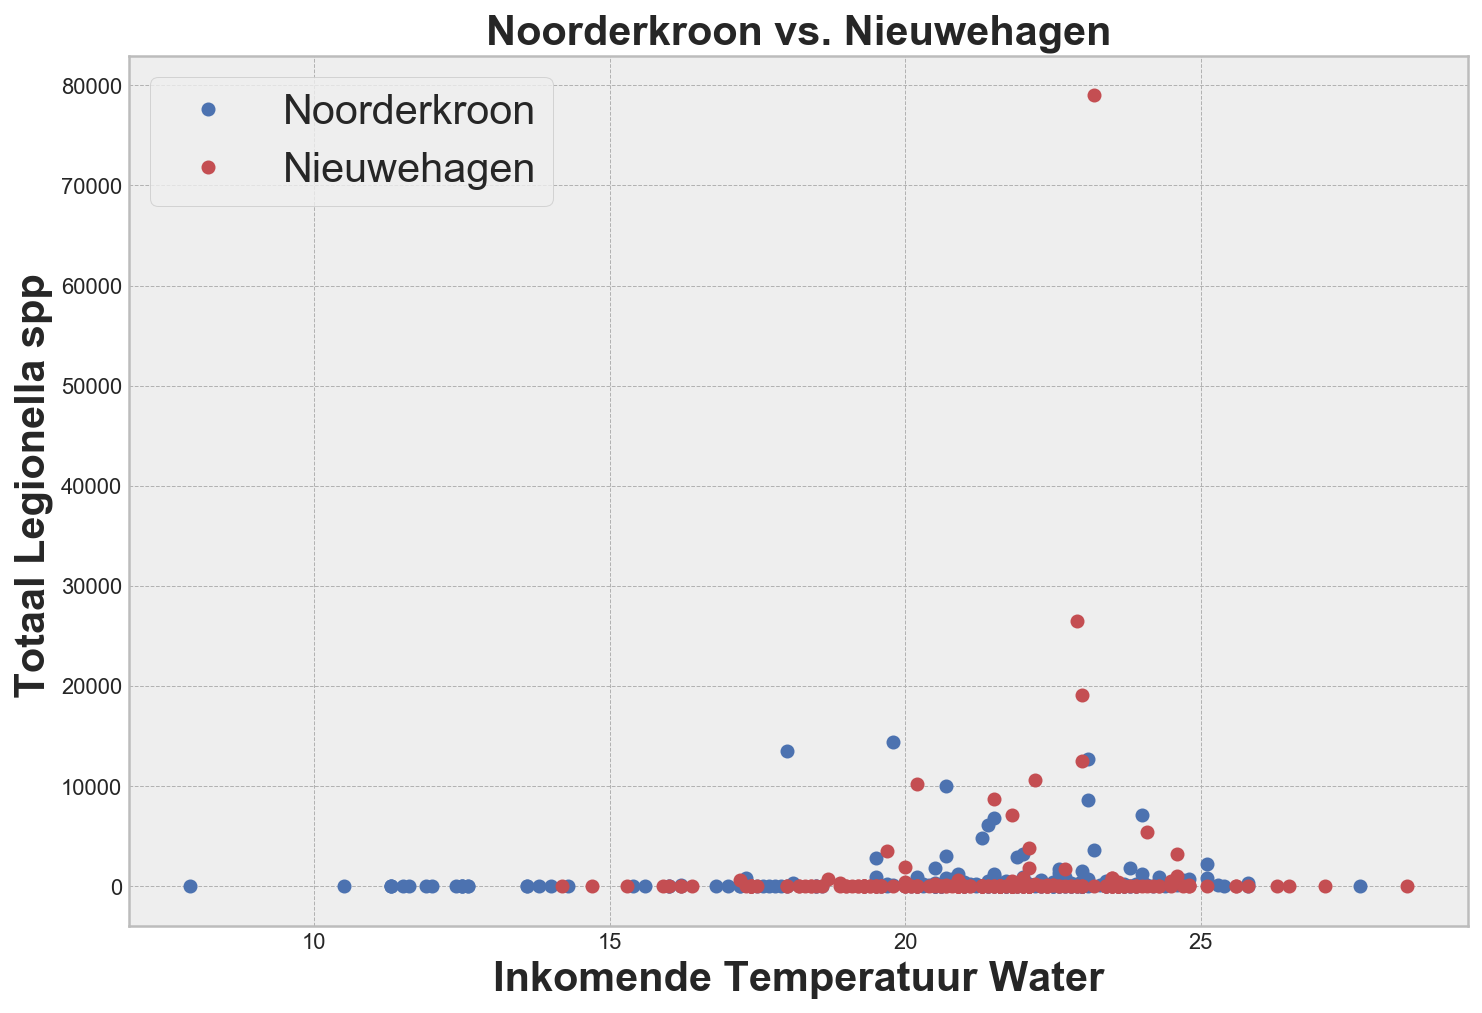

In [729]:
plt.figure()
plt.style.use('bmh')
plt.plot(df_Noorderkroon['tempvoor'], df_Noorderkroon['resultaat'], 'bo', label='Noorderkroon')
plt.plot(df_Nieuwehagen['tempvoor'], df_Nieuwehagen['resultaat'], 'ro', label='Nieuwehagen')
plt.title("Noorderkroon vs. Nieuwehagen", fontweight='bold', fontsize='xx-large')
plt.xlabel('Inkomende Temperatuur Water', fontweight='bold', fontsize='xx-large' )
plt.ylabel(' Totaal Legionella spp', fontweight='bold', fontsize='xx-large')
plt.legend(fontsize='xx-large', frameon=True)

In [519]:
df_legionella.replace({'resultaat': {'<100' : 0}}, inplace=True)

C:\Programs\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [520]:
df_legionella['resultaat'] = pd.to_numeric(df_legionella['resultaat'])

C:\Programs\Anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [537]:
df_legionella_pm = df_legionella['resultaat']
df.legionella_pm.resample()

In [538]:
df_legionella_pm
#begin 2018-05-31
#end2018-06-27

datum_tijd
2018-05-31 13:15:00       0
2018-05-31 12:45:00       0
2018-05-31 13:40:00       0
2018-05-31 13:50:00       0
2018-04-30 14:25:00       0
                       ... 
2018-08-29 12:45:00       0
2018-08-29 13:00:00       0
2018-08-29 13:15:00     100
2018-06-27 13:35:00       0
2018-06-27 13:50:00    1700
Name: resultaat, Length: 461, dtype: int64

# Merge KNMI data with Legionella parameter

In [708]:
df_KNMI_legionella = pd.merge(KNMI, df_legionella_pm, left_on=KNMI.index, right_on=df_legionella_pm.index)
df_KNMI_legionella

,key_0,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10,...,U,WW,IX,M,R,S,O,Y,MEETPUNT,resultaat
0,2016-07-18 13:00:00,370,2016-07-18,13,300,30,30,60,279,,...,49,,5,0,0,0,0,0,Eindhoven,0
1,2016-07-18 13:30:00,370,2016-07-18,13,300,30,30,60,279,,...,49,,5,0,0,0,0,0,Eindhoven,0
2,2016-07-18 13:45:00,370,2016-07-18,13,300,30,30,60,279,,...,49,,5,0,0,0,0,0,Eindhoven,200
3,2016-07-18 14:00:00,370,2016-07-18,14,270,30,20,60,279,,...,45,,5,0,0,0,0,0,Eindhoven,0
4,2016-08-31 13:30:00,370,2016-08-31,13,260,40,40,70,248,,...,43,,5,0,0,0,0,0,Eindhoven,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2019-09-30 12:00:00,370,2019-09-30,12,260,70,70,120,170,124,...,64,,5,0,0,0,0,0,Eindhoven,0
179,2019-09-30 12:15:00,370,2019-09-30,12,260,70,70,120,170,124,...,64,,5,0,0,0,0,0,Eindhoven,100
180,2019-09-30 12:30:00,370,2019-09-30,12,260,70,70,120,170,124,...,64,,5,0,0,0,0,0,Eindhoven,0
181,2019-09-30 13:00:00,370,2019-09-30,13,260,60,50,100,170,,...,62,,5,0,0,0,0,0,Eindhoven,0


In [709]:
df_KNMI_legionella.set_index('key_0', inplace=True)

Text(31.125, 0.5, 'Legionella spp [kve/L]')

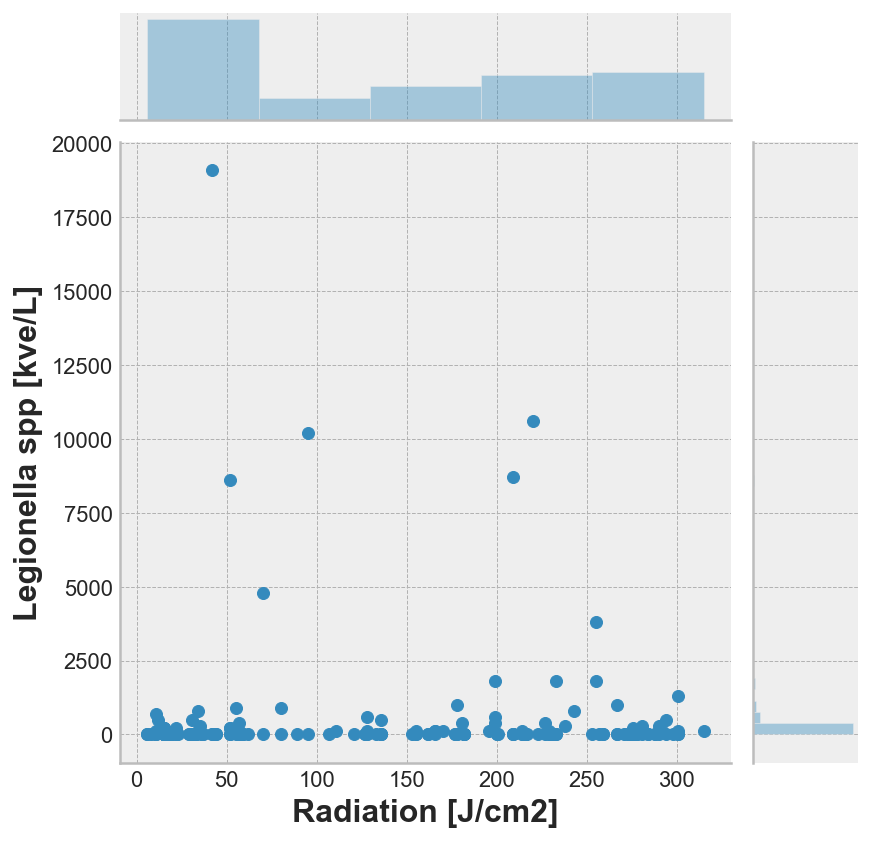

In [727]:
plt.style.use('bmh')
h = sns.jointplot(df_KNMI_legionella['Q'], df_KNMI_legionella['resultaat'], kind='scatter')
#ax.xlabel('Radiation [J/cm2]')


# JointGrid has a convenience function
h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('Radiation [J/cm2]', fontweight='bold')
h.ax_joint.set_ylabel('Legionella spp [kve/L]', fontweight='bold')

In [646]:
corr = df_KNMI_legionella.corr()

(22, 1)

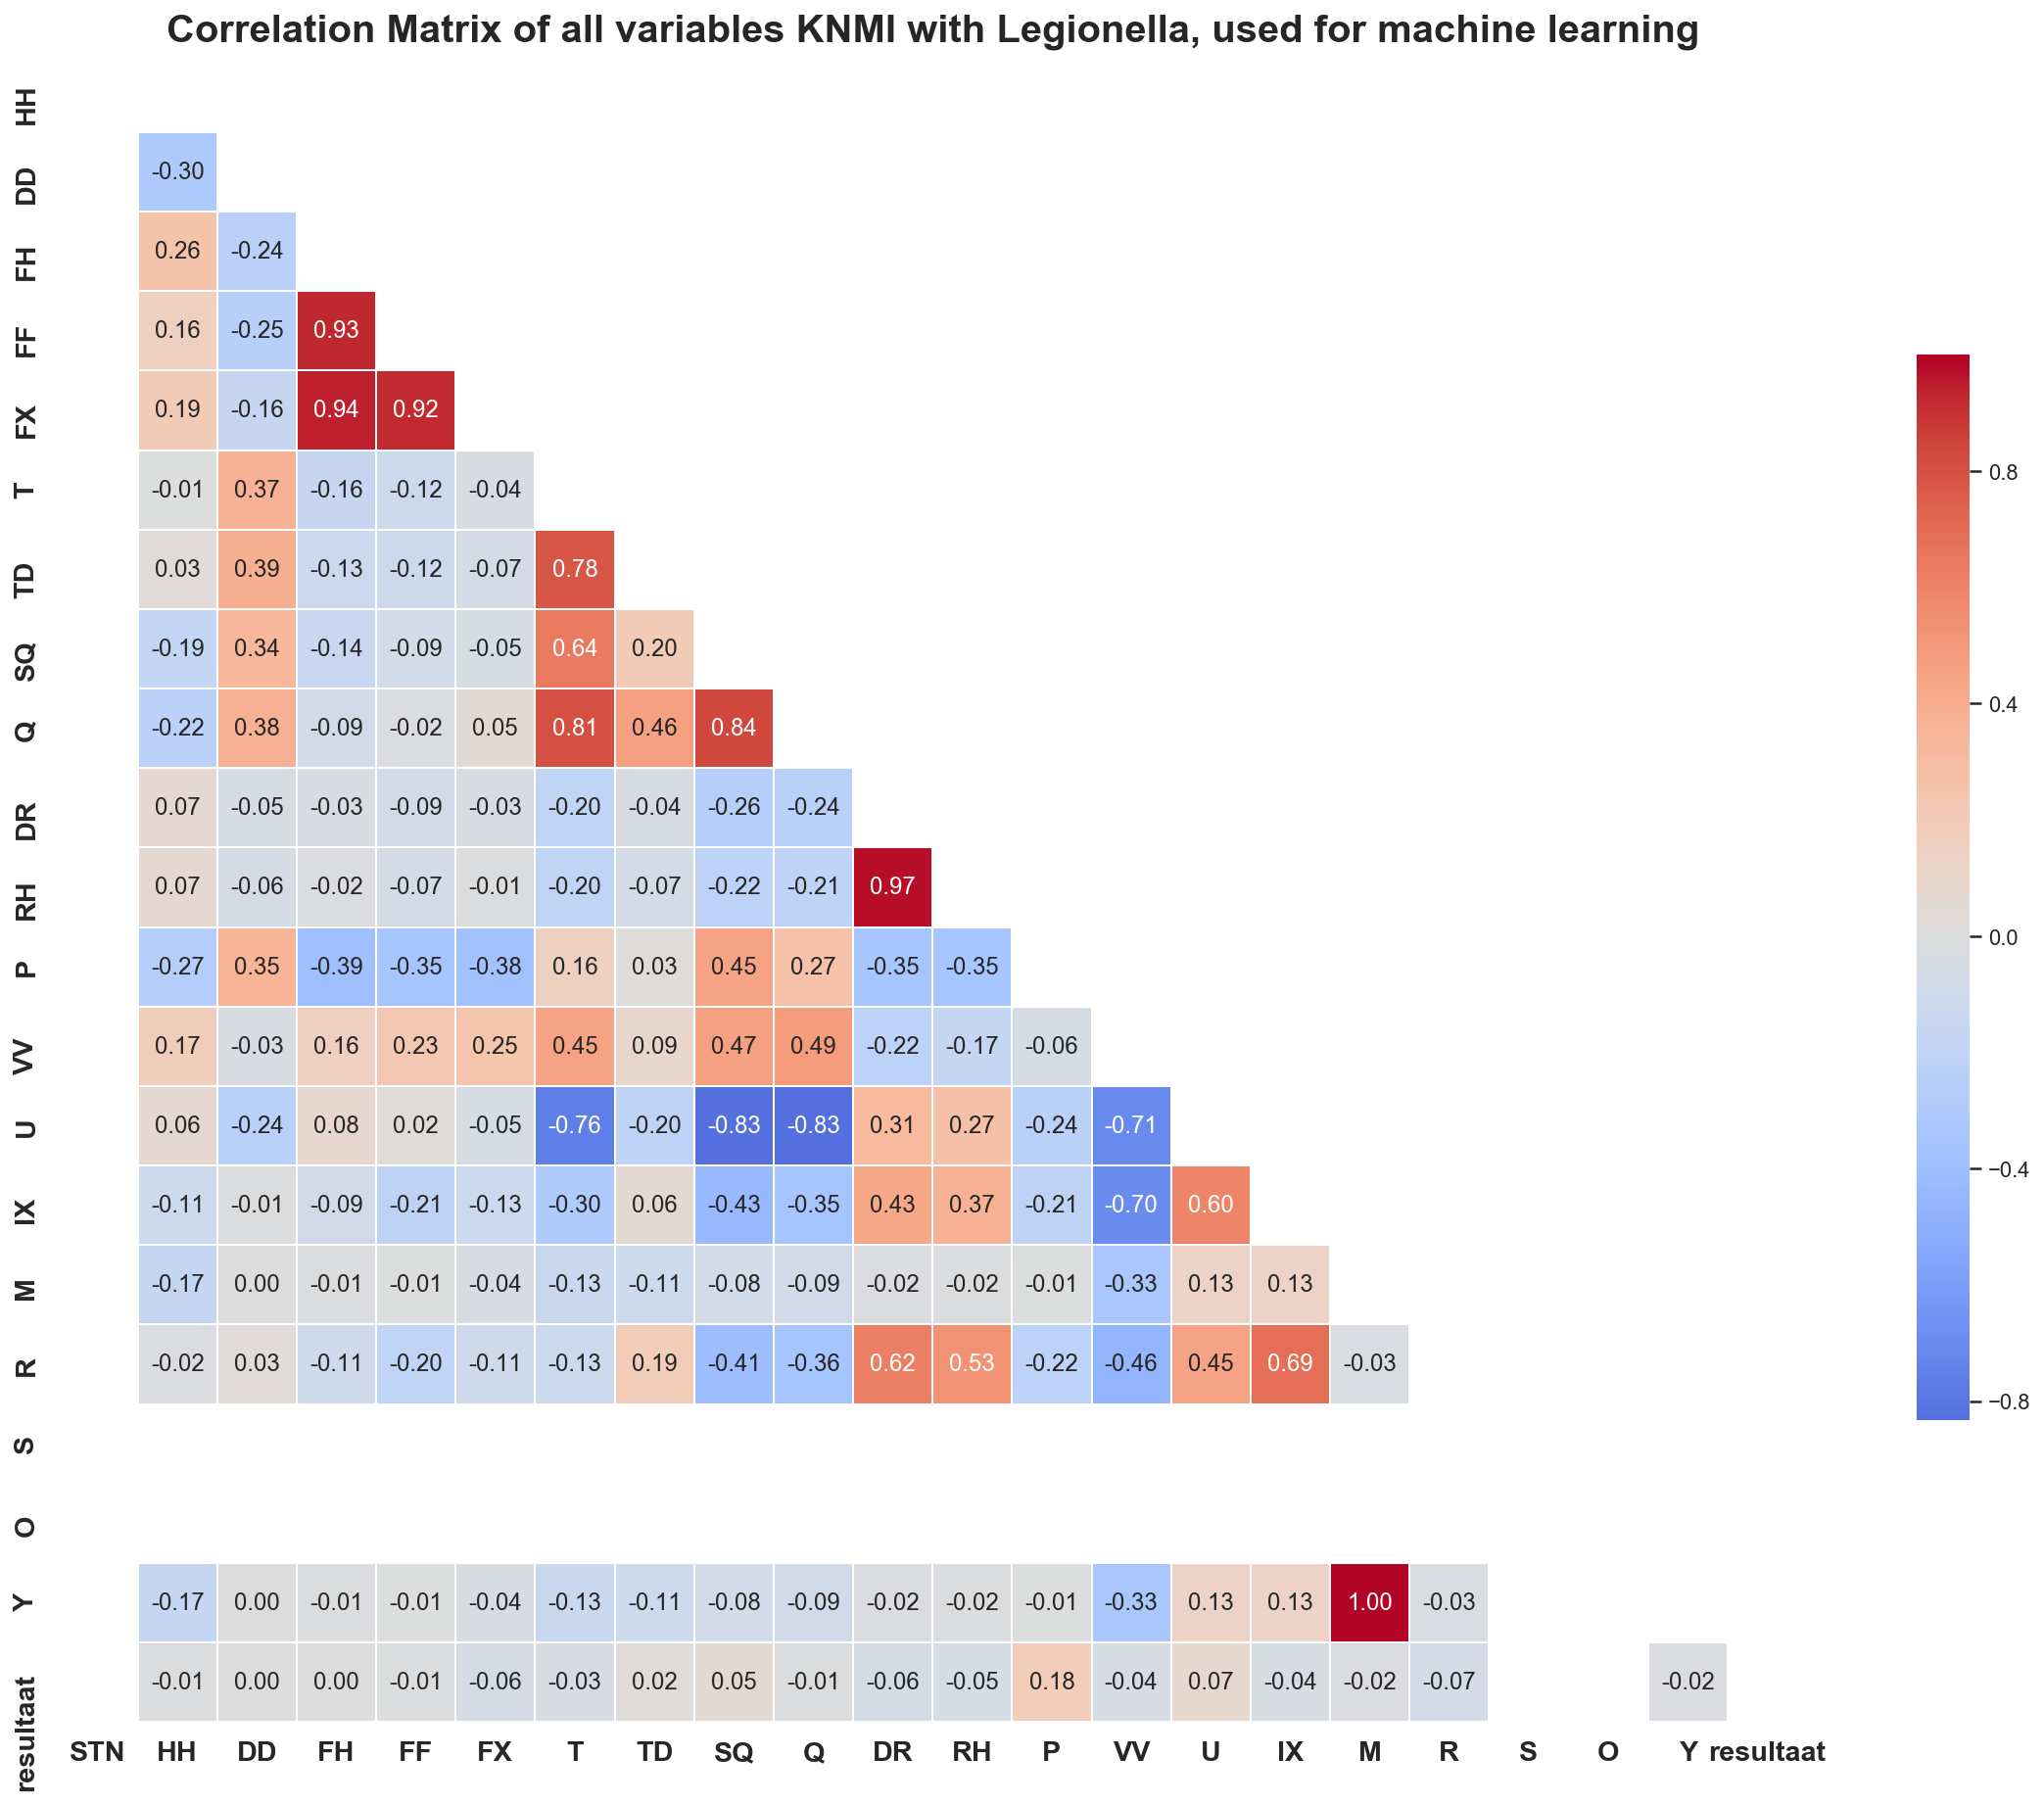

In [652]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, ax=ax, mask=mask,  cmap="coolwarm", center=0, annot=True, square=True, linewidths=0.5, cbar_kws={"shrink":.5}, fmt=".2f");

plt.title("Correlation Matrix of all variables KNMI with Legionella, used for machine learning", fontsize='20', fontweight='bold')
plt.xticks(fontweight='bold', fontsize='large');
plt.yticks(fontweight='bold', fontsize='large');
ax.get_ylim()
ax.set_ylim(22,1)


# Temperatuur - Flow

In [744]:
Temperatuur = pd.read_csv('Temperatuur_Flow.csv', sep=',', index_col=['uitleestijdstip'])

In [745]:
Temperatuur

,Unnamed: 0,v-app,ligging,volume 1,gelogde min. mediumtemp.,gelogde gemiddelde omgevingstemp.,delta (omg-med),gelogde max. flow 1
uitleestijdstip,,,,,,,,
2019-04-18 00:02:00,0,v1-1,zon,0.093,11,14,3,0.375
2019-04-18 01:01:00,1,v1-1,zon,0.093,12,15,3,0.436
2019-04-18 02:02:00,2,v1-1,zon,0.093,12,15,3,0.436
2019-04-18 03:03:00,3,v1-1,zon,0.093,12,15,3,0.436
2019-04-18 04:02:00,4,v1-1,zon,0.093,12,15,3,0.436
...,...,...,...,...,...,...,...,...
2019-10-22 09:04:00,157404,v7-5,zon,15.775,15,20,5,0.454
2019-10-22 09:58:00,157405,v7-5,zon,15.784,15,20,5,0.454
2019-10-22 11:01:00,157406,v7-5,zon,15.792,15,20,5,0.454


In [746]:
Temperatuur.columns = ['unnamed', 'v-app','ligging', 'Q water meter', 'Tmin incoming water', 'Tgem omgeving', 'delta T', 'Q verbruik/dag']

In [748]:
Temperatuur_per_app = Temperatuur.groupby('v-app')

In [779]:
#few examples
df_v1_1 = Temperatuur_per_app.get_group('v1-1')
df_v1_3 = Temperatuur_per_app.get_group('v1-3')
df_v1_5 = Temperatuur_per_app.get_group('v1-5')

Text(0, 0.5, 'Incoming water T')

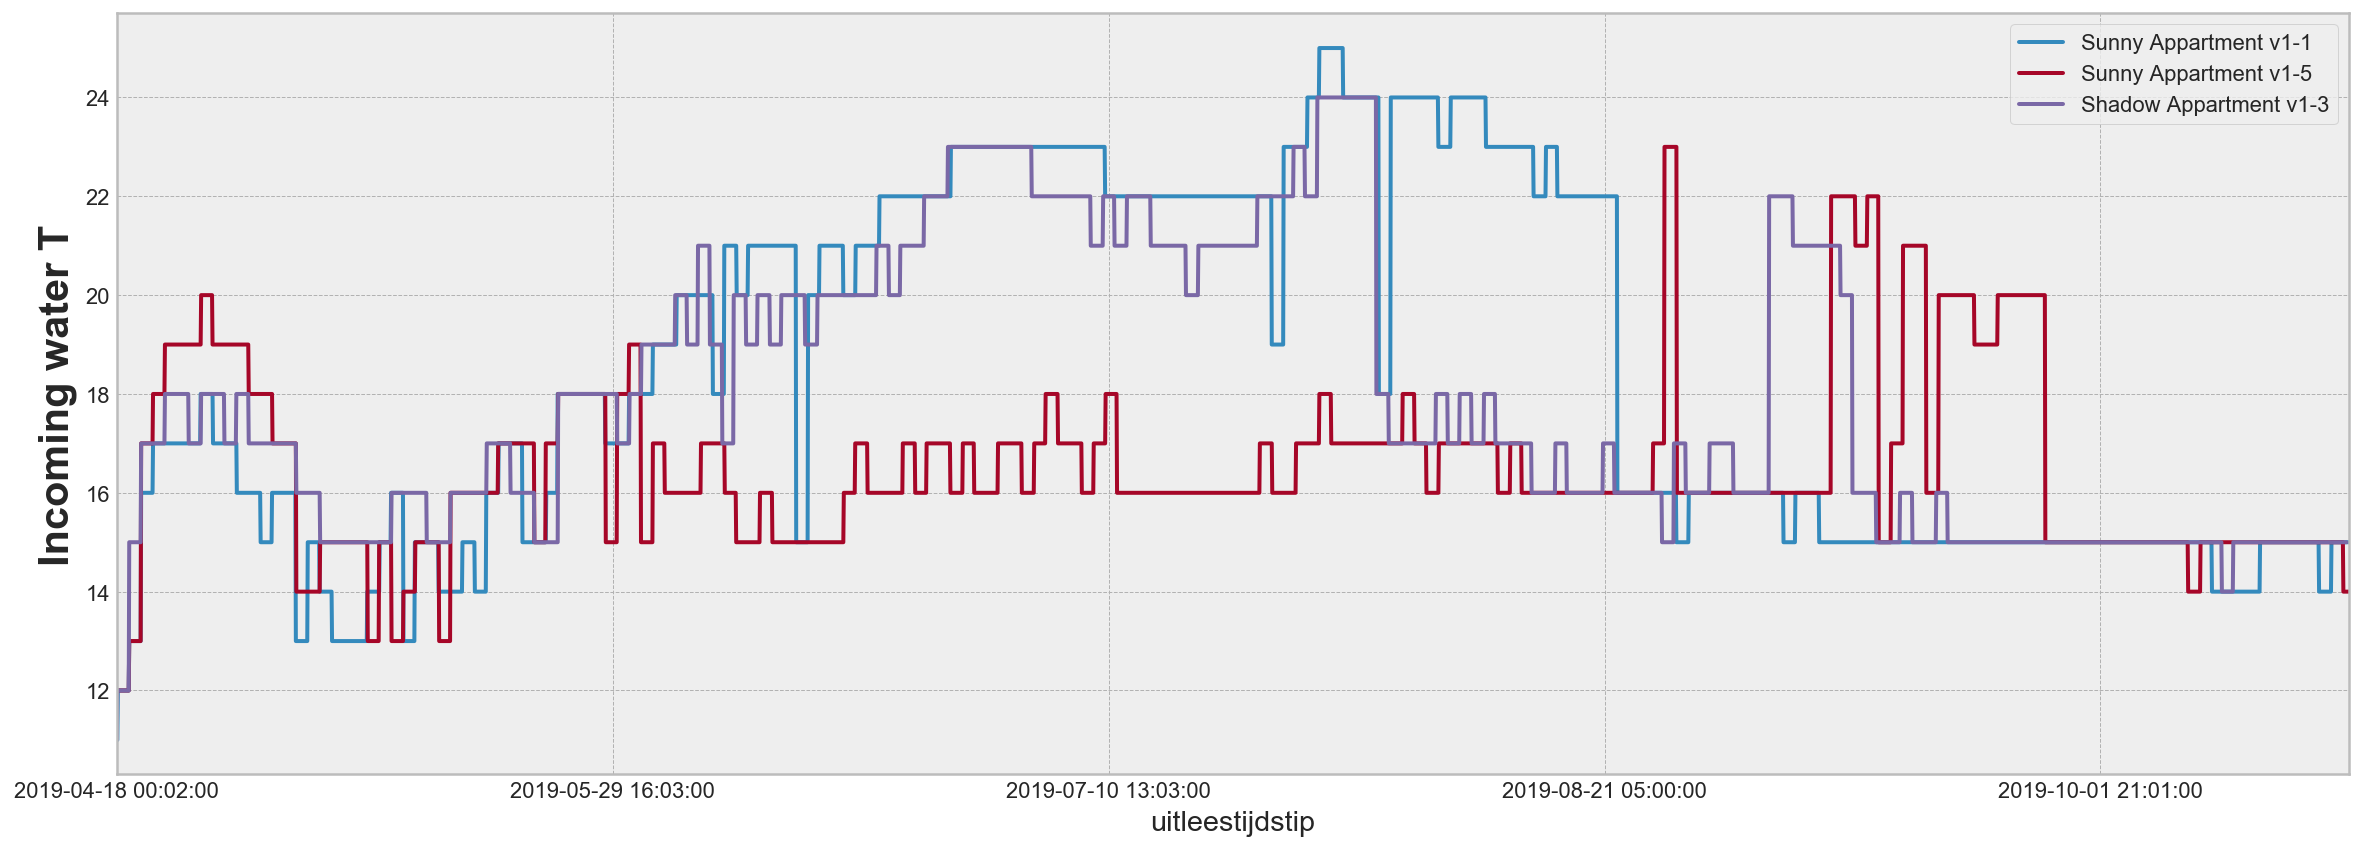

In [784]:
ax = df_v1_3['Tmin incoming water'].plot(label='Sunny Appartment v1-1', figsize=(20,7))
df_v1_5['Tmin incoming water'].plot(ax=ax, label='Sunny Appartment v1-5')
df_v1_1['Tmin incoming water'].plot(ax=ax, label='Shadow Appartment v1-3')
ax.legend()
ax.set_ylabel('Incoming water T', fontsize='xx-large', fontweight='bold')

Text(31.125, 0.5, 'Q water meter')

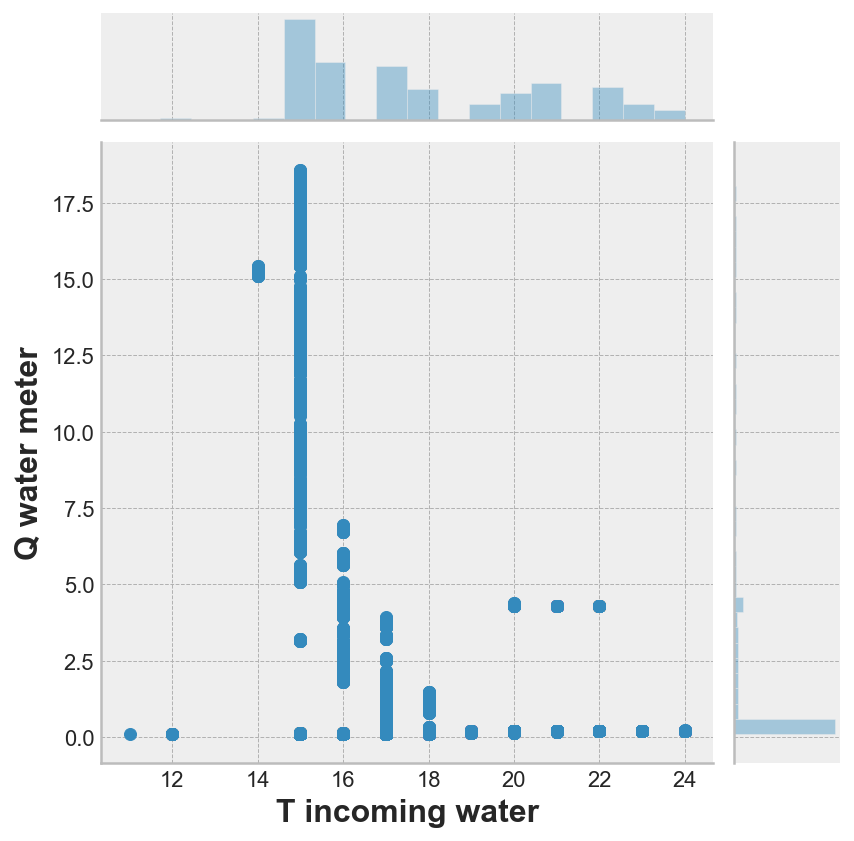

In [755]:
h = sns.jointplot(df_v1_1['Tmin incoming water'], df_v1_1['Q water meter'])


# JointGrid has a convenience function
h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('T incoming water', fontweight='bold')
h.ax_joint.set_ylabel('Q water meter', fontweight='bold')

Text(31.125, 0.5, 'Q water meter')

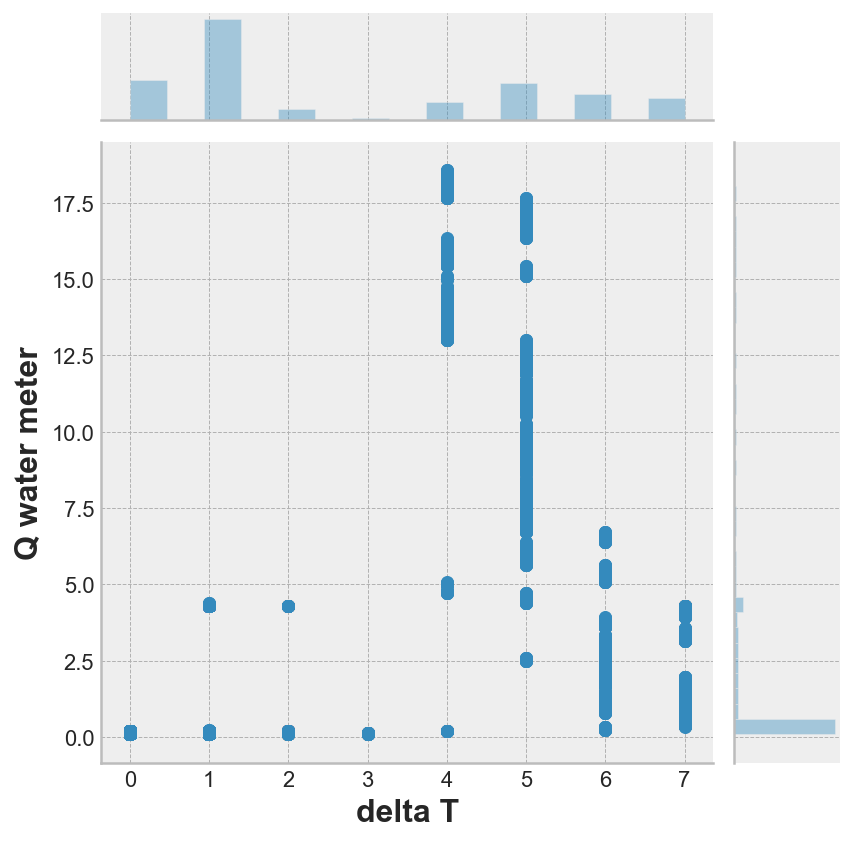

In [759]:
h = sns.jointplot(df_v1_1['delta T'], df_v1_1['Q water meter'])


# JointGrid has a convenience function
h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('delta T', fontweight='bold')
h.ax_joint.set_ylabel('Q water meter', fontweight='bold')

Text(0, 0.5, 'Temperature (T)')

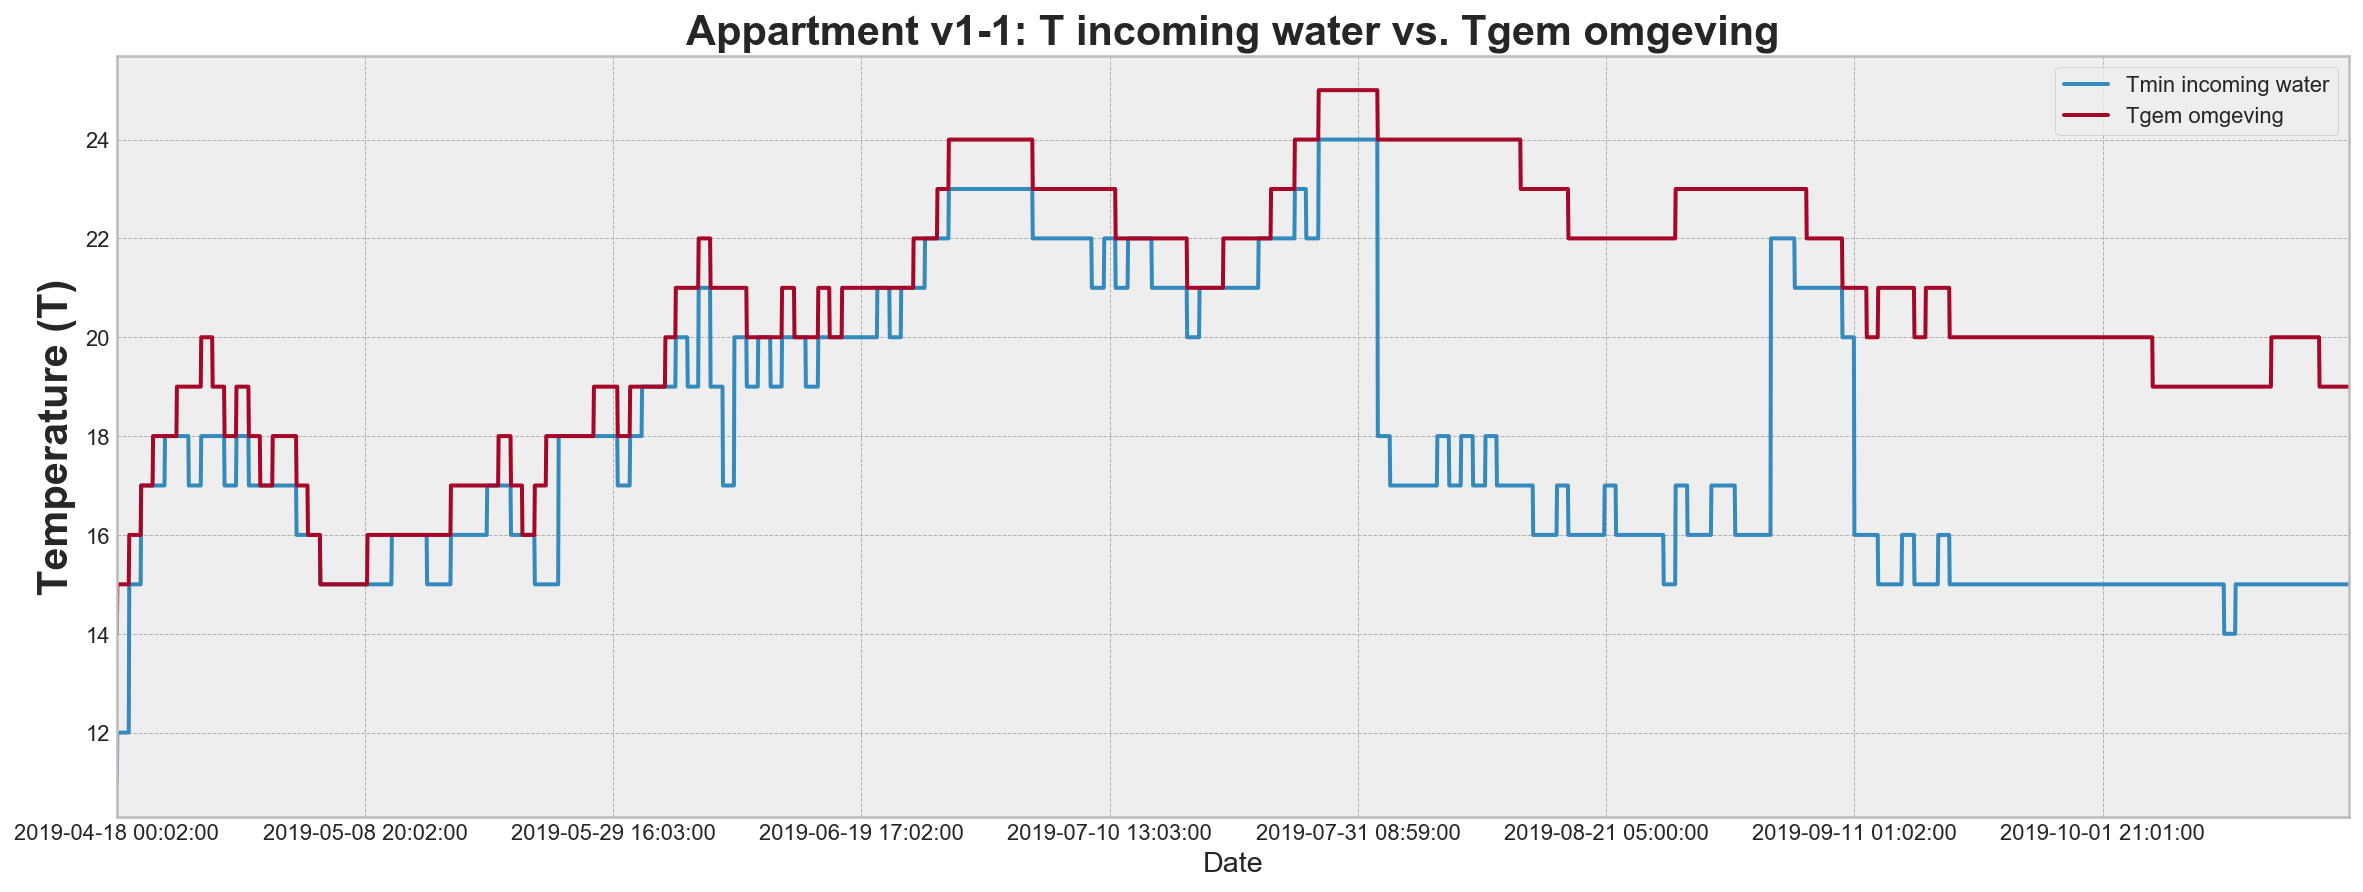

In [739]:
ax = df_v1_1['Tmin incoming water'].plot(figsize=(20,7), label='Tmin incoming water')
df_v1_1['Tgem omgeving'].plot(ax=ax, label='Tgem omgeving')
ax.legend()
ax.set_title('Appartment v1-1: T incoming water vs. Tgem omgeving', fontsize='xx-large', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (T)', fontsize='xx-large', fontweight='bold')

# Merge KNMI data with Tincoming water

In [668]:
df_KNMI_Twater = pd.concat([KNMI, df_v1_1['Tmin incoming water']])

In [669]:
df_KNMI_Twater

,0,DD,DR,FF,FH,FX,HH,IX,M,MEETPUNT,...,SQ,STN,T,T10,TD,U,VV,WW,Y,YYYYMMDD
2016-06-01 01:00:00,NaN,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,Eindhoven,...,0.0,370.0,133.0,,130.0,98.0,14.0,20,0.0,2016-06-01
2016-06-01 01:15:00,NaN,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,Eindhoven,...,0.0,370.0,133.0,,130.0,98.0,14.0,20,0.0,2016-06-01
2016-06-01 01:30:00,NaN,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,Eindhoven,...,0.0,370.0,133.0,,130.0,98.0,14.0,20,0.0,2016-06-01
2016-06-01 01:45:00,NaN,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,Eindhoven,...,0.0,370.0,133.0,,130.0,98.0,14.0,20,0.0,2016-06-01
2016-06-01 02:00:00,NaN,250.0,0.0,10.0,10.0,20.0,2.0,7.0,0.0,Eindhoven,...,0.0,370.0,126.0,,123.0,98.0,50.0,10,0.0,2016-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-22 09:03:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2019-10-22 09:58:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2019-10-22 11:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2019-10-22 12:03:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [671]:
corrT = df_KNMI_Twater.corr()

(24, 1)

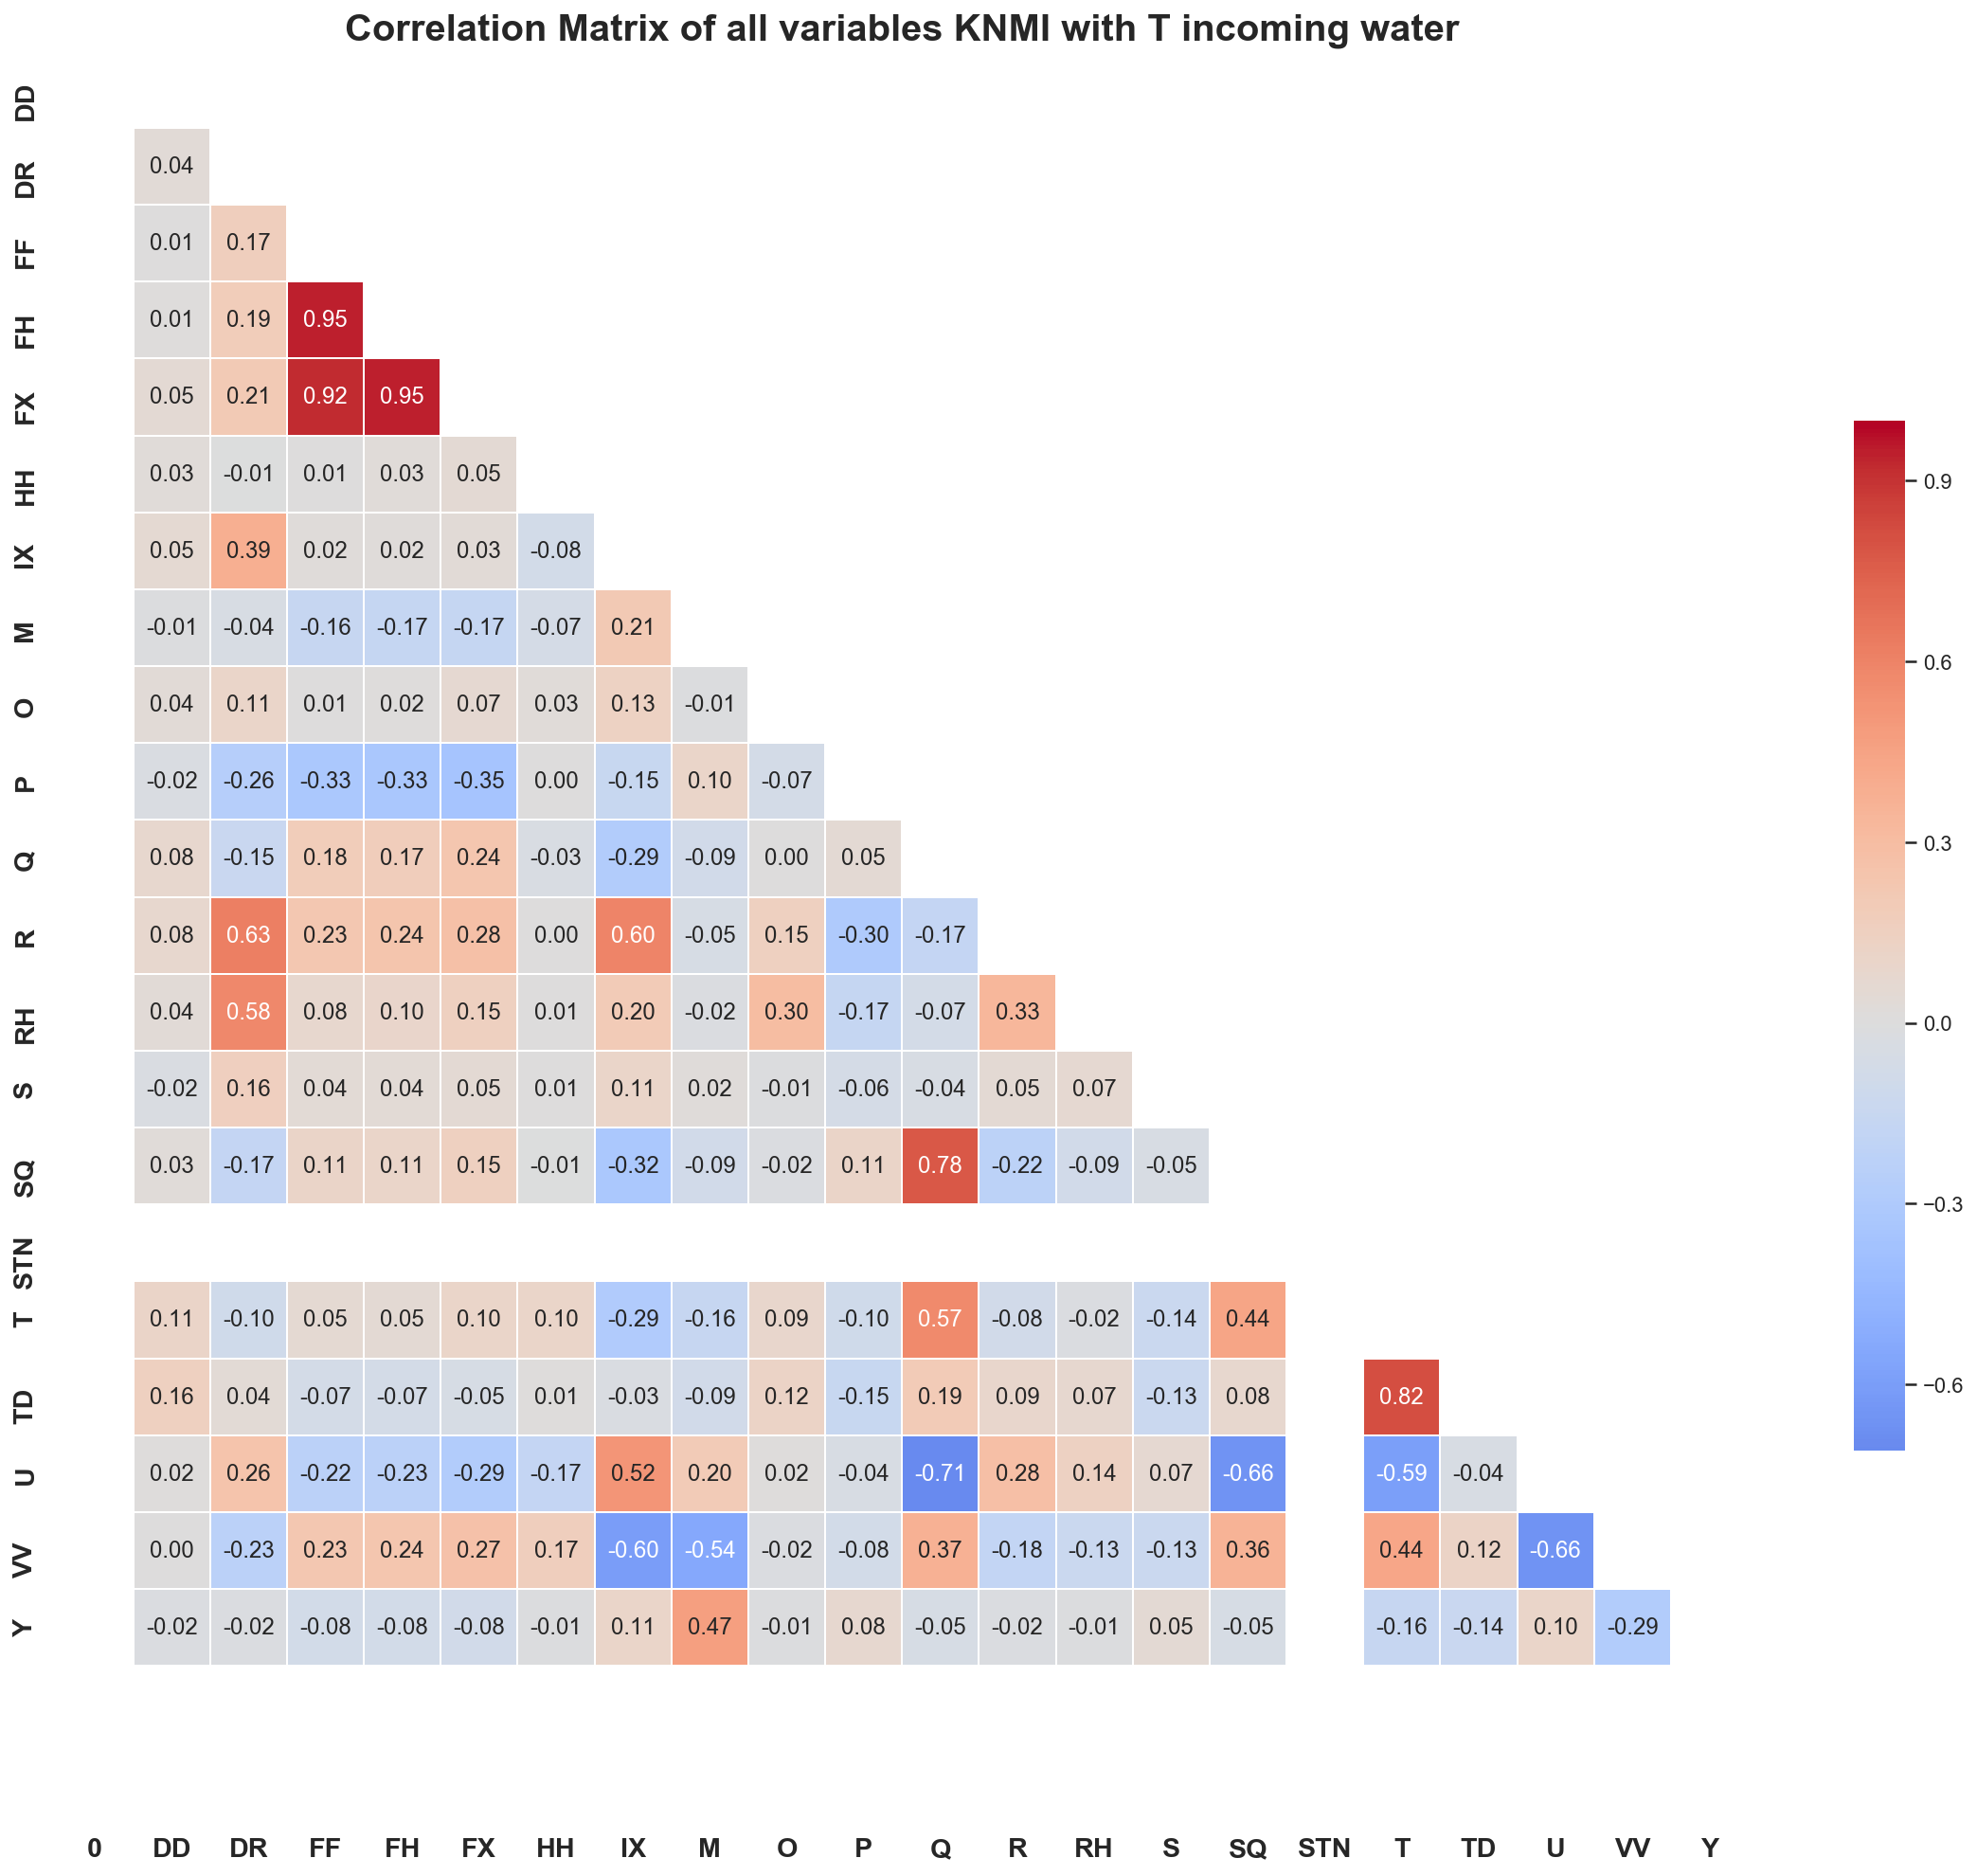

In [707]:
sns.set(style='white')
mask = np.zeros_like(corrT, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corrT, ax=ax, mask=mask,  cmap="coolwarm", center=0, annot=True, square=True, linewidths=0.5, cbar_kws={"shrink":.5}, fmt=".2f");

plt.title("Correlation Matrix of all variables KNMI with T incoming water", fontsize='20', fontweight='bold')
plt.xticks(fontweight='bold', fontsize='large');
plt.yticks(fontweight='bold', fontsize='large');
ax.get_ylim()
ax.set_ylim(24,1)